In [1]:
# Load processed data and necessary Libraries
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu, chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

df = pd.read_csv("../data/banksim_clean_imputed.csv")

In [2]:
# Table 2: Mann–Whitney U (Wilcoxon rank-sum) test for 'amount' feature
fraud_amounts = df.loc[df['isFraud'] == "Fraud", 'amount']
legit_amounts = df.loc[df['isFraud'] == "Legit", 'amount']

u_stat, p_val = mannwhitneyu(fraud_amounts, legit_amounts, alternative='two-sided')
u_stat, p_val

(41224999611.0, 0.0)

In [3]:
# Table 3: Chi-squared test for transaction type vs fraud
contingency = pd.crosstab(df['type'], df['isFraud'])
chi2, p, dof, expected = chi2_contingency(contingency)
chi2, dof, p

(22082.535713191082, 4, 0.0)

In [4]:
# Logistic Regression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig']]
y = (df['isFraud'] == "Fraud").astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [5]:
# ROC Curve + AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
auc

0.9785352168870344

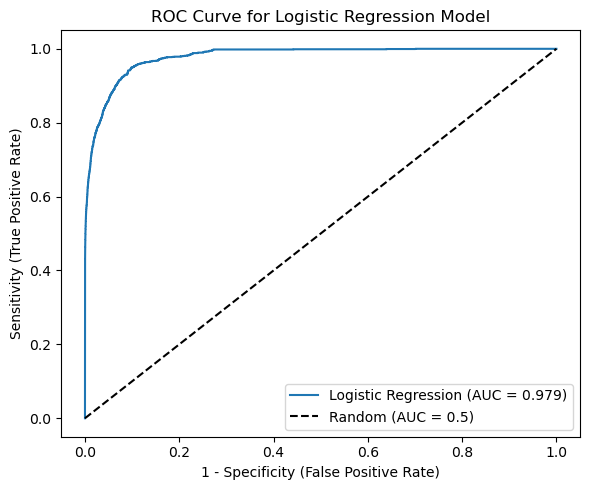

In [ ]:
# Figure 3:ROC Curve
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC = 0.5)")
plt.xlabel("1 - Specificity (False Positive Rate)")
plt.ylabel("Sensitivity (True Positive Rate)")
plt.title("ROC Curve for Logistic Regression Model")
plt.legend()
plt.tight_layout()
plt.show()